# Imports

In [147]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Data

In [148]:
CONDUCTOR = (
    [1.00, 3.40, 4.25, 6.25],
    [14.50, 30.00, 33.75, 36.25],
    [3600.00, 4800.00, 5000.00, 5000.00]
)

In [149]:
X = np.arange(0.00, 16.00, 0.01)

# Interpolation

In [150]:
angle_interpolator = interp1d(
    CONDUCTOR[0],
    CONDUCTOR[1],
    kind='linear',
    bounds_error=False,
    fill_value='extrapolate',
    assume_sorted=True,
)
angles = angle_interpolator(X)

In [151]:
speed_interpolator = interp1d(
    CONDUCTOR[0],
    CONDUCTOR[2],
    kind='linear',
    bounds_error=False,
    fill_value='extrapolate',
    assume_sorted=True,
)
speeds = speed_interpolator(X)

# Functions

In [152]:
def createPlot(size: tuple[float, float] = (8, 8), dpi: int = 200) -> tuple[_, plt.Axes]:
    return plt.subplots(figsize=size, dpi=dpi)

In [153]:
def distanceXAxis(ax: plt.Axes) -> None:
    ax.set_xlabel("Distance (Meters)")
    ax.set_xlim(0.00, 16.00)
    ax.set_xticks(np.arange(0, 16.01, 1.00), minor=False)
    ax.set_xticks(np.arange(0, 16.01, 0.25), minor=True)

# Graphs

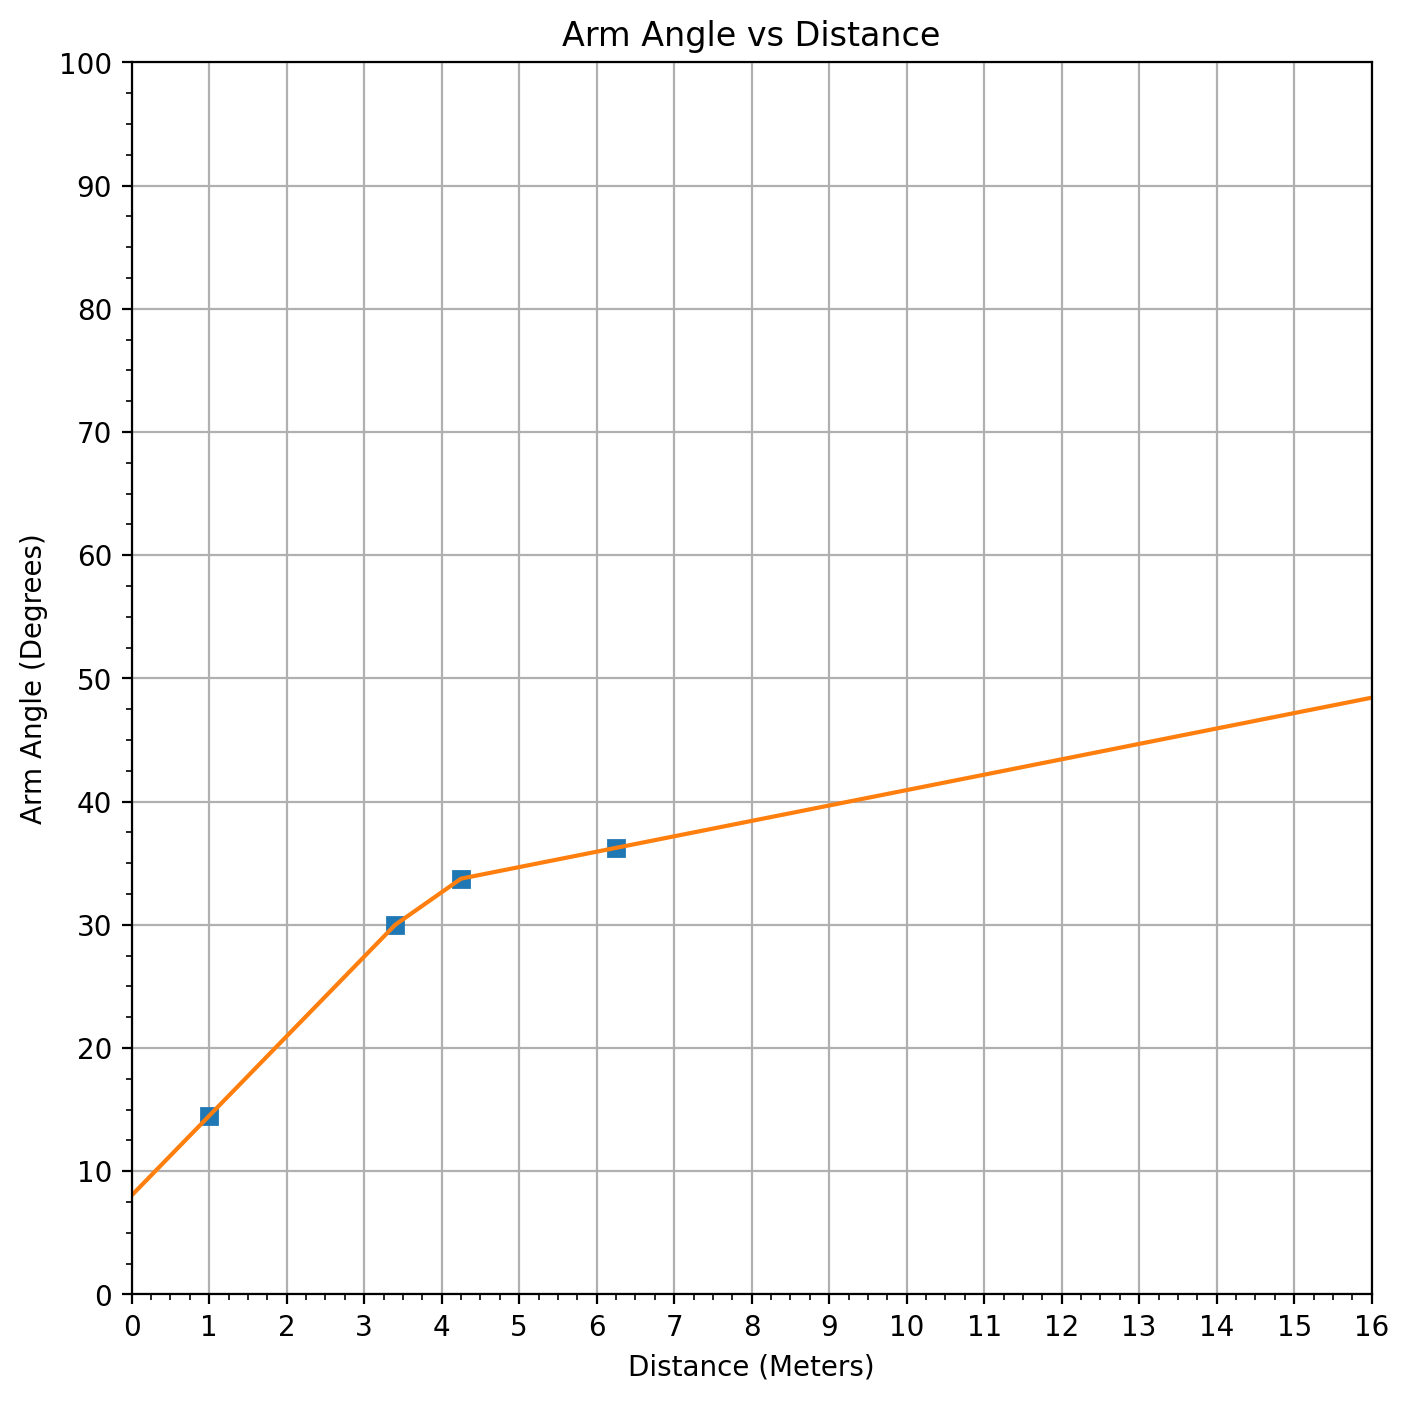

In [154]:
figure_1, ax = createPlot()

ax.plot(CONDUCTOR[0], CONDUCTOR[1], marker='s', linestyle='None')
ax.plot(X, angles)

distanceXAxis(ax)

ax.set_ylabel('Arm Angle (Degrees)')
ax.set_ylim(0.00, 100.00)
ax.set_yticks(np.arange(0, 100.01, 10.00), minor=False)
ax.set_yticks(np.arange(0, 100.01, 2.50), minor=True)

ax.set_title('Arm Angle vs Distance')
ax.grid(True)

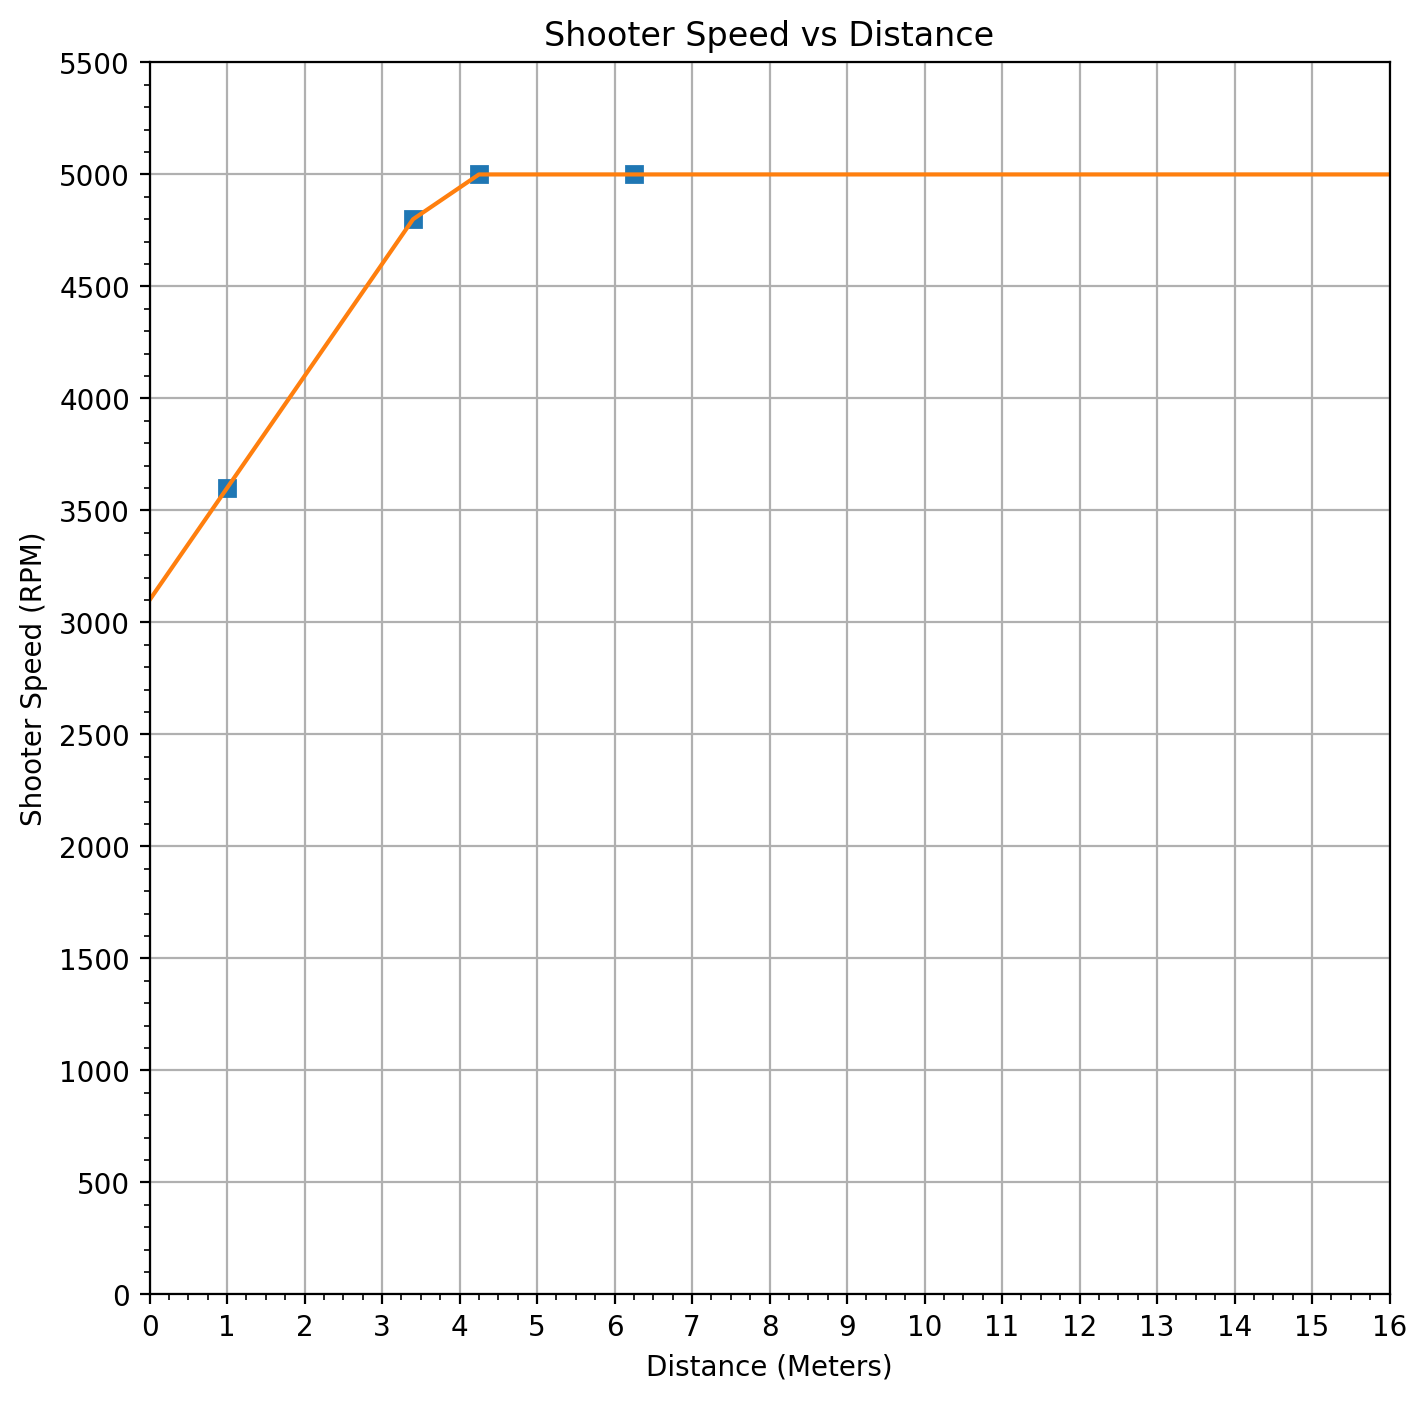

In [155]:
figure_2, ax = createPlot()

ax.plot(CONDUCTOR[0], CONDUCTOR[2], marker='s', linestyle='None')
ax.plot(X, speeds)

distanceXAxis(ax)

ax.set_ylabel('Shooter Speed (RPM)')
ax.set_ylim(0.00, 5500.00)
ax.set_yticks(np.arange(0, 5500.01, 500.00), minor=False)
ax.set_yticks(np.arange(0, 5500.01, 100.00), minor=True)

ax.set_title('Shooter Speed vs Distance')
ax.grid(True)